**EXAMEN BIG DATA**


1.   **ABABACAR SAGNA 220673**
2.   **KANKOU MARIE SANOGO 221544**





# Importer les bibliotheques

In [34]:
# Importer les bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, log_loss
from scipy.optimize import minimize
import random

In [35]:
# Charger les données à partir du fichier CSV
df = pd.read_csv("/content/drive/MyDrive/Dataset/creditcard.csv")

# EXPLORER LES DONNEES

In [36]:
# Afficher les premières lignes du DataFrame
print(df.head(5))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [37]:
# Afficher des informations sur les données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [38]:
# Vérifier s'il y a des valeurs manquantes
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


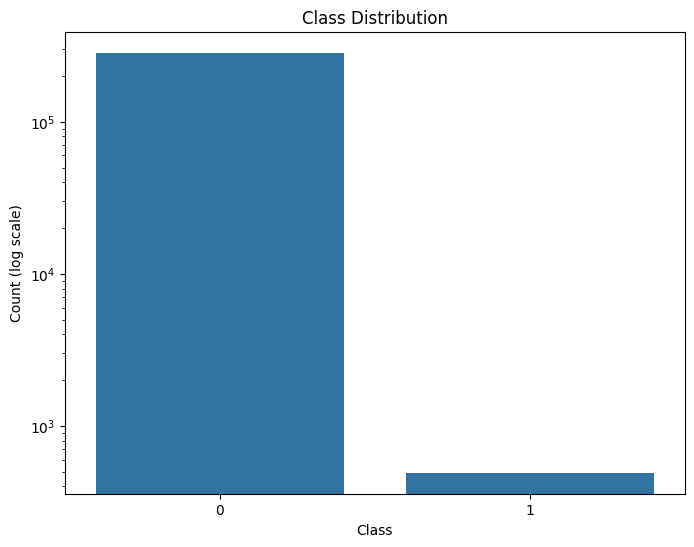

In [39]:
# Visualiser la distribution des classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count (log scale)')
plt.yscale('log')
plt.show()

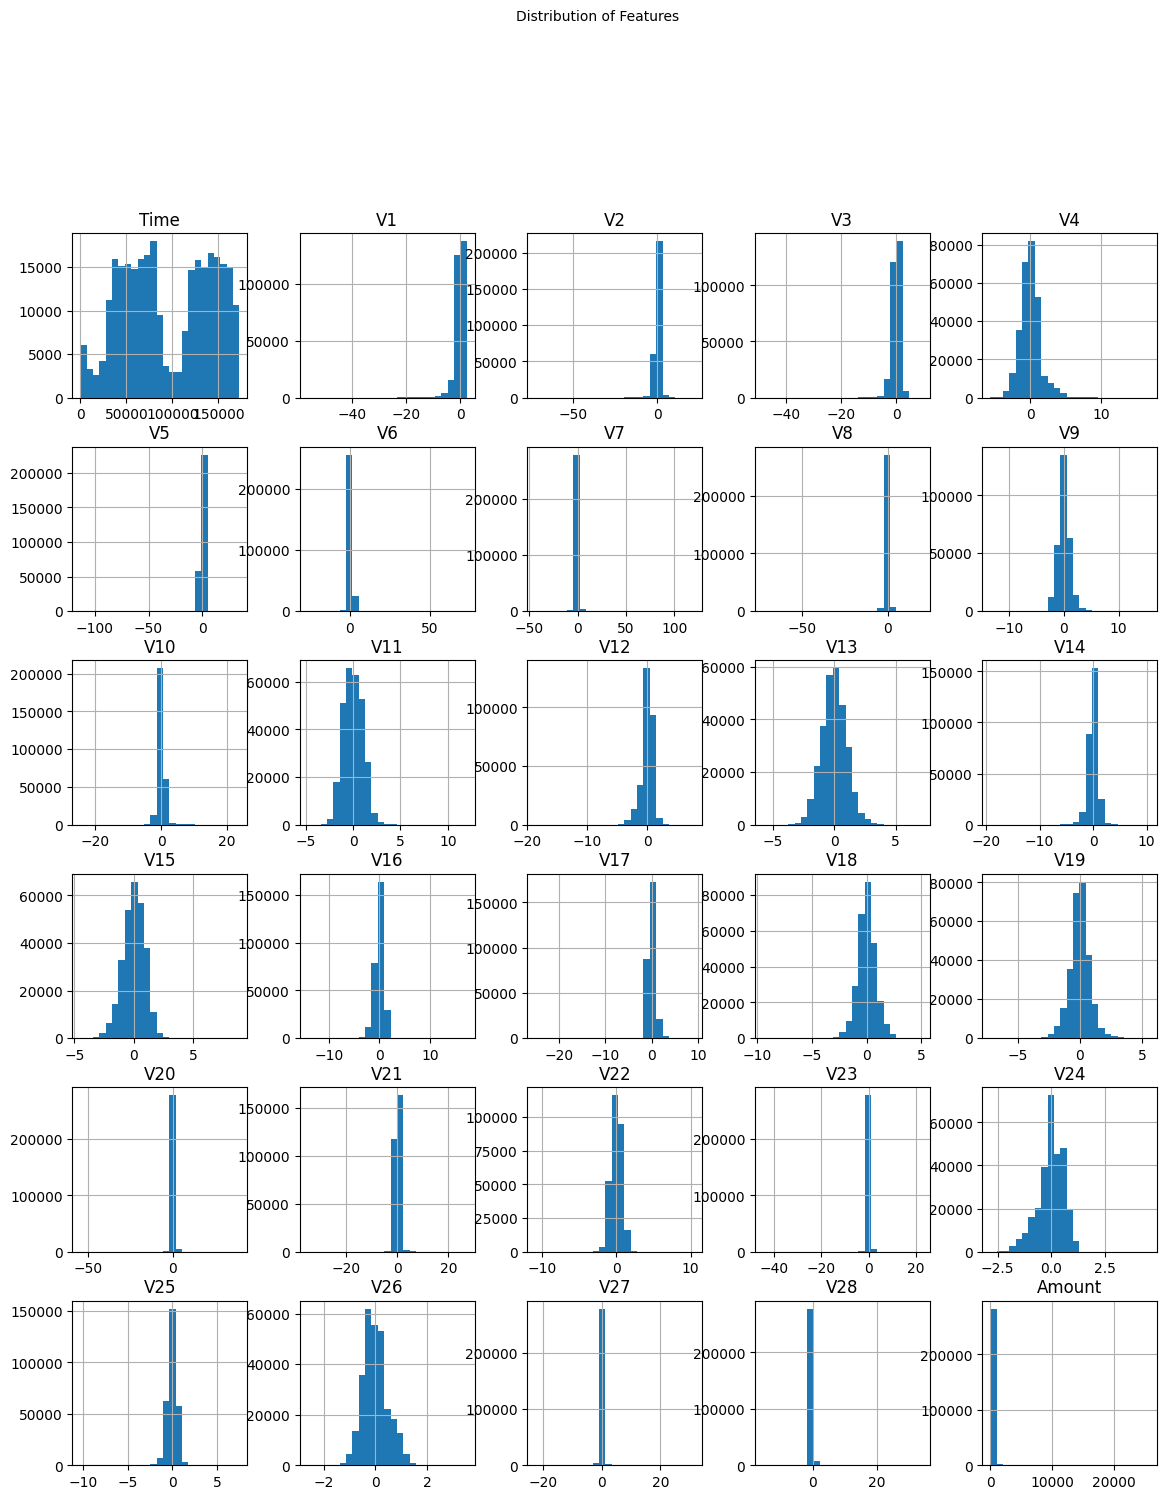

In [40]:
# Histogrammes des caractéristiques
df.drop('Class', axis=1).hist(bins=25, figsize=(14, 16))
plt.suptitle("Distribution of Features", y=1.02, fontsize=10)
plt.show()

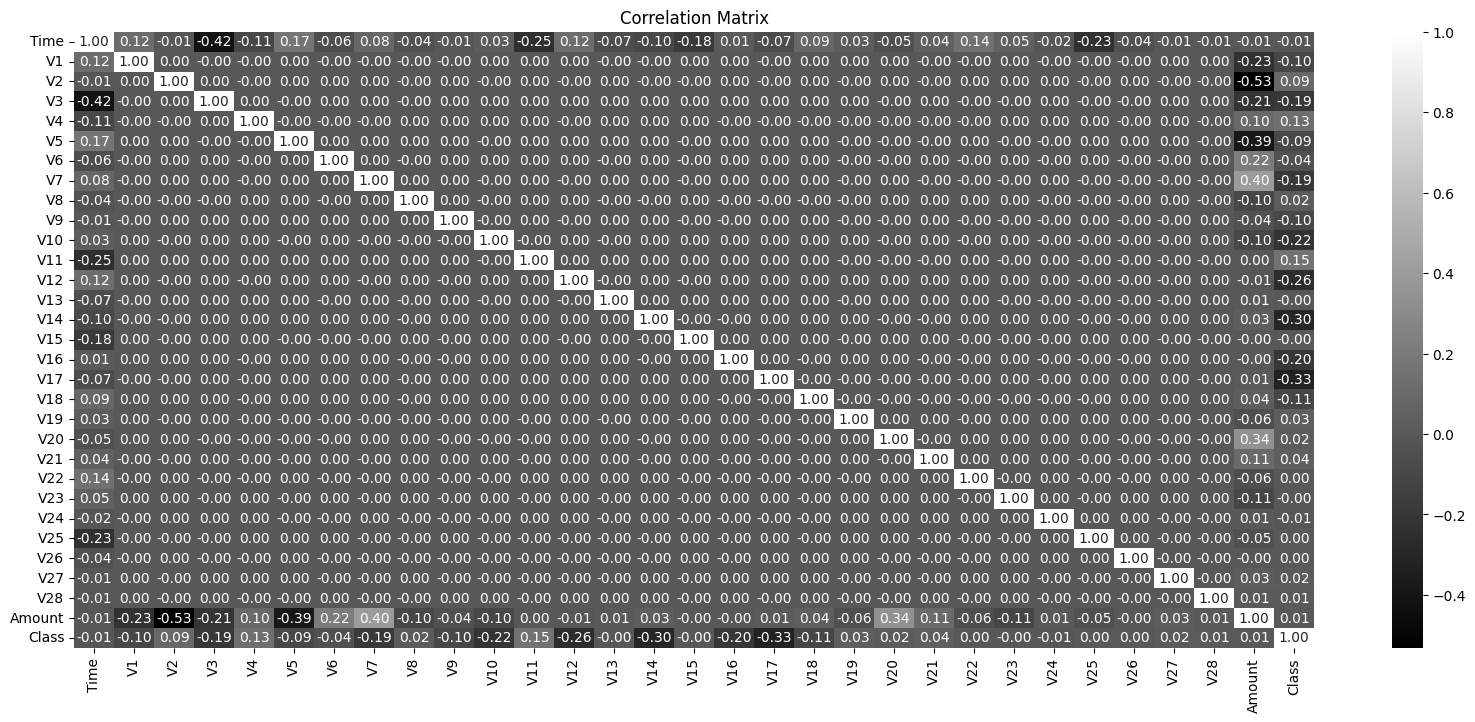

In [41]:
# Explorer la corrélation entre les caractéristiques
plt.figure(figsize=(20, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='gray', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# DATA PROCESSING

In [42]:
# Diviser les données en Features X et Target y
X = df.drop('Class', axis=1)
y = df['Class']

# Diviser l'ensemble de données en ensembles de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [43]:
# Standardiser les caractéristiques 'Time' et 'Amount'
scaler = StandardScaler()
X_train[['Time', 'Amount']] = scaler.fit_transform(X_train[['Time', 'Amount']])
X_test[['Time', 'Amount']] = scaler.transform(X_test[['Time', 'Amount']])


In [44]:
from imblearn.over_sampling import SMOTE
# Appliquer SMOTE seulement sur l'ensemble d'entraînement
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [45]:
from collections import Counter

# Compter le nombre d'occurrences de chaque classe dans l'ensemble de données original
original_class_distribution = Counter(y_train)
print("Distribution des classes avant SMOTE :", original_class_distribution)



Distribution des classes avant SMOTE : Counter({0: 227451, 1: 394})


In [46]:
# Compter le nombre d'occurrences de chaque classe dans l'ensemble de données après SMOTE
resampled_class_distribution = Counter(y_train_resampled)
print("Distribution des classes après SMOTE :", resampled_class_distribution)



Distribution des classes après SMOTE : Counter({0: 227451, 1: 227451})


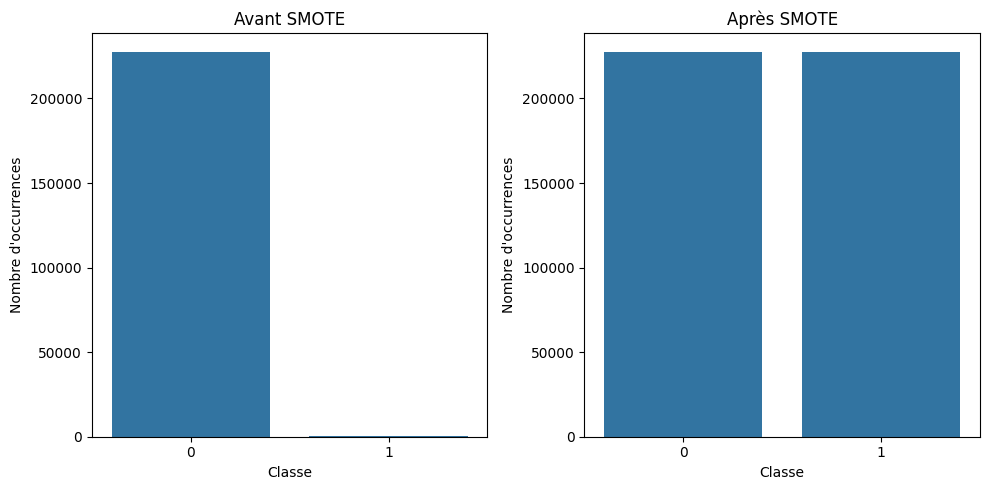

In [47]:
# Créer des tracés de barres pour visualiser la distribution des classes
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=list(original_class_distribution.keys()), y=list(original_class_distribution.values()))
plt.title('Avant SMOTE')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.subplot(1, 2, 2)
sns.barplot(x=list(resampled_class_distribution.keys()), y=list(resampled_class_distribution.values()))
plt.title('Après SMOTE')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'occurrences')
plt.tight_layout()
plt.show()


# MODELE: RANDOM FOREST

*Selection des caracteristiques en fonction du score avec ANOVA F. Ce dernier s'assure si les moyennes de différentes classes sont significativement différentes.*

In [48]:
# Sélection des caractéristiques les plus importantes
selector = SelectKBest(score_func=f_classif, k=16)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)


In [49]:
# Mise à l'échelle des caractéristiques sélectionnées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [50]:
# Création du modèle Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)



In [51]:
# Entraînement du modèle sur les caractéristiques mises à l'échelle et sélectionnées
rf_model.fit(X_train_scaled, y_train_resampled)


RandomForestClassifier(random_state=42)

In [52]:
# Prédictions sur l'ensemble de test avec les caractéristiques sélectionnées
y_pred_rf = rf_model.predict(X_test_scaled)


In [53]:
# Évaluation du modèle
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.81      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.90      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**INTERPRETATION DES RESULTATS:**

*   Precision : Pour la classe 0 (transactions non frauduleuses), la précision est de 1.00, ce qui signifie que toutes les transactions prédites comme non frauduleuses étaient effectivement non frauduleuses. Pour la classe 1 (transactions frauduleuses), la précision est de 0.81, ce qui signifie que 81% des transactions prédites comme frauduleuses étaient effectivement frauduleuses.
*   Recall  : Pour la classe 0, le rappel est de 1.00, ce qui signifie que le modèle a identifié correctement toutes les transactions non frauduleuses dans l'ensemble de données. Pour la classe 1, le rappel est également de 0.81, ce qui signifie que le modèle a identifié correctement 81% des transactions frauduleuses dans l'ensemble de données.


*   F1-score :Pour la classe 0, le F1-score est de 1.00, ce qui indique un excellent équilibre entre la précision et le rappel. Pour la classe 1, le F1-score est de 0.81, ce qui indique également un bon équilibre entre la précision et le rappel.
*   Accuracy  :Avec une accuracy de 1.00, cela signifie que toutes les prédictions sont correctes sur l'ensemble des données de test.


*   Macro avg et weighted avg : Ces moyennes fournissent une vue d'ensemble des performances du modèle sur l'ensemble des données de test. La macro avg prend simplement la moyenne des métriques (précision, rappel, F1-score) pour chaque classe, tandis que la weighted avg prend en compte le déséquilibre de classe en pondérant les métriques par le nombre d'exemples dans chaque classe.







**FONCTION COUT:**
On va utiliser la perte de bissection, également appelée perte logistique ou entropie croisée (cross-entropy loss).Elle mesure la divergence entre les probabilités prédites par le modèle et les probabilités réelles des classes.

In [54]:
# Calculer les probabilités prédites pour les classes positives
y_probs = rf_model.predict_proba(X_test_scaled)


In [55]:
# Calculer la perte de bissection
logloss = log_loss(y_test, y_probs)
print("Log Loss:", logloss)


Log Loss: 0.008450313992001843


**INTERPRETATION:** Une perte de bissection de 0.0084 indique une très bonne performance du modèle en termes de calibrage des probabilités de classe. En général, une valeur de log loss proche de zéro indique une excellente capacité du modèle à prédire les probabilités de classe avec précision. Cela suggère que votre modèle est bien calibré et confiant dans ses prédictions de probabilité pour les classes.

**OPTIMISATION DE LA FONCTION COUT**

In [56]:
# Aplatir les probabilités prédites pour obtenir un vecteur unidimensionnel
y_probs_flat = y_probs[:, 1].flatten()  # On prend uniquement les probabilités associées à la classe positive (classe 1)

# Définir la fonction de perte de log à minimiser
def log_loss_function(params):
    # Calculer la perte de log
    loss = log_loss(y_test, np.tile(params, (len(y_test), 1)))
    return loss

# Initialiser les paramètres initiaux avec une valeur moyenne
initial_params = np.mean(y_probs_flat)

# Minimiser la fonction de perte de log à l'aide de la descente de gradient
optimized_params = minimize(log_loss_function, initial_params, method='L-BFGS-B')

# Calculer la perte de log optimisée
log_loss_optimized = optimized_params.fun
print("Log Loss (optimized):", log_loss_optimized)


Log Loss (optimized): 0.012669894374693156


**INTERPPRETATION:** La valeur de la perte de log optimisée est de 0.0126. Cela signifie que le modèle a réussi à ajuster les probabilités prédites pour minimiser la perte de log sur l'ensemble de test. Une valeur plus faible de la perte de log indique généralement de meilleures performances du modèle en termes de calibration des probabilités.

# MODELE FINAL

In [57]:
# Sélection des caractéristiques les plus importantes
selector = SelectKBest(score_func=f_classif, k=16)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)



In [58]:
# Mise à l'échelle des caractéristiques sélectionnées
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)



In [59]:
# Création et entraînement du modèle RandomForestClassifier sur l'ensemble complet de données
rf_model_final = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_model_final.fit(X_train_scaled, y_train)



RandomForestClassifier(max_depth=7, random_state=42)

In [60]:
# Prédictions sur l'ensemble de test
y_pred_rf_final = rf_model_final.predict(X_test_scaled)


In [61]:
# Évaluation du modèle final
print("Random Forest Classifier (Final Model) :")
print(classification_report(y_test, y_pred_rf_final))


Random Forest Classifier (Final Model) :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.90      0.80      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.92     56962
weighted avg       1.00      1.00      1.00     56962



**INTERPRETATION : **


*   Précision :Pour la classe 0 (transactions non frauduleuses), une précision de 1.00 signifie qu'aucune transaction non frauduleuse n'a été faussement prédite comme frauduleuse. Cela indique une excellente capacité du modèle à identifier correctement les transactions non frauduleuses.
Pour la classe 1 (transactions frauduleuses), une précision de 0.90 indique que 90% des transactions prédites comme frauduleuses étaient effectivement frauduleuses. Cela montre une amélioration par rapport au modèle précédent, indiquant une réduction des faux positifs.
*   Rappel :Pour la classe 0, un rappel de 1.00 indique que toutes les transactions non frauduleuses ont été correctement identifiées par le modèle. Il n'y a pas de faux négatifs pour cette classe.
Pour la classe 1, un rappel de 0.80 signifie que 80% des transactions frauduleuses ont été identifiées par le modèle. Cela montre une légère baisse par rapport au modèle précédent, indiquant une augmentation des faux négatifs.


*   F1-score :Le F1-score combine la précision et le rappel en une seule mesure. Avec un F1-score de 0.84 pour la classe 1, cela montre une amélioration par rapport au modèle précédent, indiquant un meilleur équilibre entre la précision et le rappel pour la détection des transactions frauduleuses.
*   Accuracy :L'accuracy globale du modèle est toujours de 1.00, ce qui signifie que toutes les prédictions sont correctes sur l'ensemble des données de test.


*   Macro avg et weighted avg :  Ces moyennes sont légèrement meilleures par rapport au modèle précédent, ce qui montre une amélioration globale des performances.







**PRECISION RECALL CURVE**

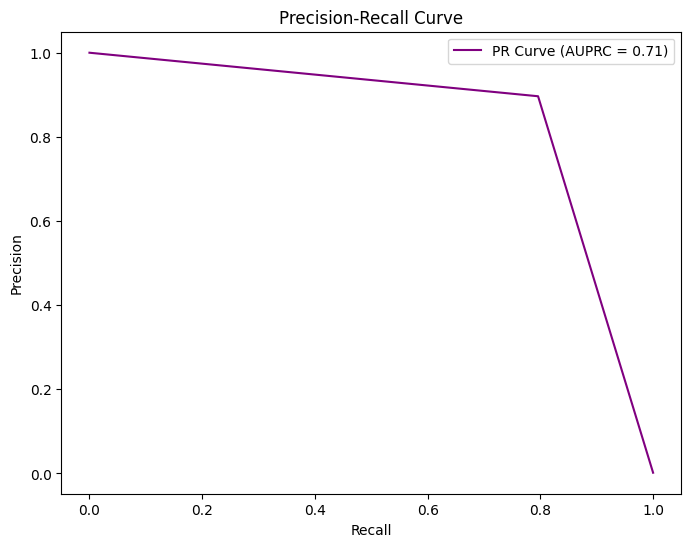

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_rf_final)
auprc = average_precision_score(y_test, y_pred_rf_final)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f'PR Curve (AUPRC = {auprc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

**ROC CURVE**

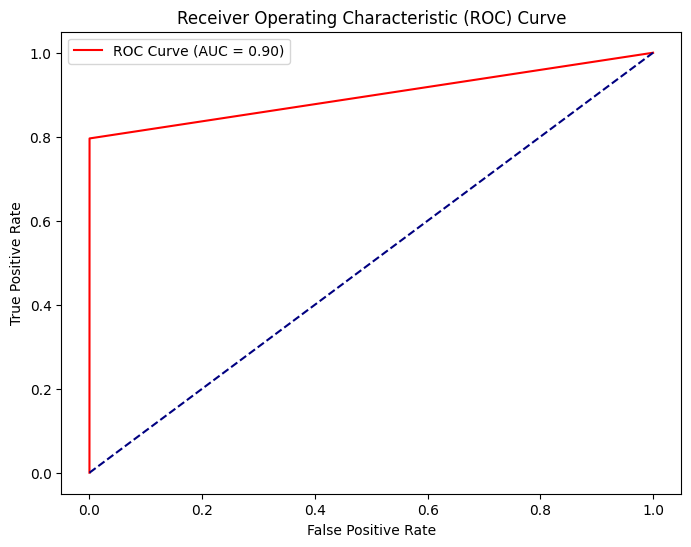

In [63]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_final)
auc = roc_auc_score(y_test, y_pred_rf_final)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Les noms des colonnes des 16 meilleures caractéristiques sélectionnées:
Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V21'],
      dtype='object')


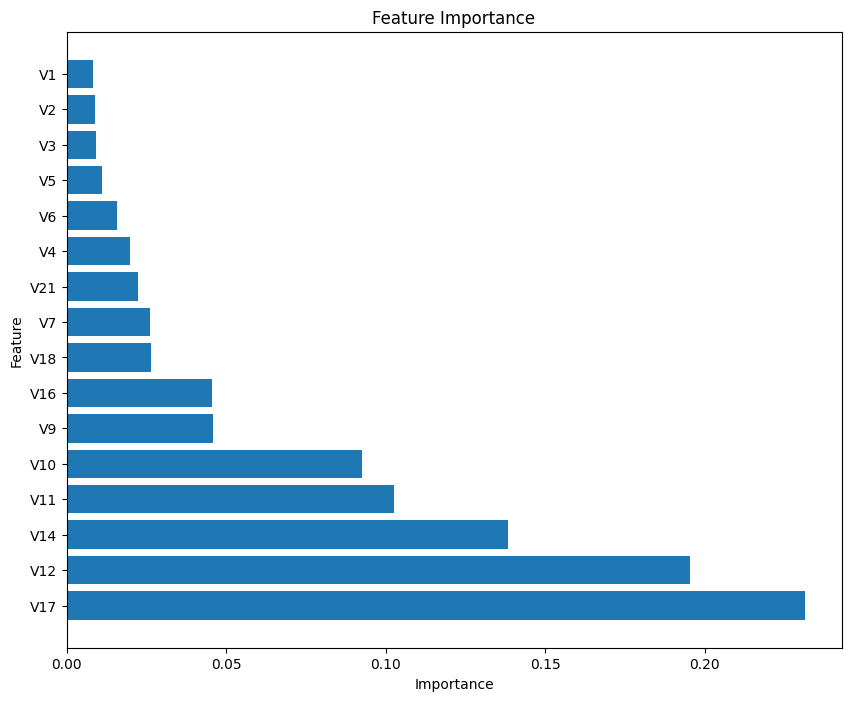

In [64]:


# Obtenir les indices des caractéristiques sélectionnées
selected_feature_indices = selector.get_support(indices=True)

# Obtenir les noms des colonnes correspondantes
selected_feature_names = X_train.columns[selected_feature_indices]

print("Les noms des colonnes des 16 meilleures caractéristiques sélectionnées:")
print(selected_feature_names)

# Obtenir les importances des caractéristiques sélectionnées
selected_feature_importances = rf_model_final.feature_importances_

# Trier les caractéristiques et leurs importances correspondantes par ordre décroissant d'importance
sorted_idx = np.argsort(selected_feature_importances)[::-1]
sorted_feature_names = selected_feature_names[sorted_idx]
sorted_feature_importances = selected_feature_importances[sorted_idx]

# Afficher le graphe d'importance des caractéristiques
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_feature_importances)), sorted_feature_importances[::-1], align='center')
plt.yticks(range(len(sorted_feature_importances)), sorted_feature_names[::-1])  # Inversion des noms de caractéristiques pour l'axe y
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Inversion de l'axe y pour afficher les caractéristiques les plus importantes en haut
plt.show()




# TEST

<ipython-input-83-1516c95678b5>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette='magma')


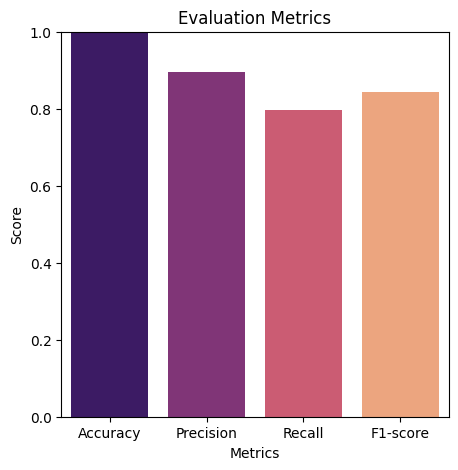

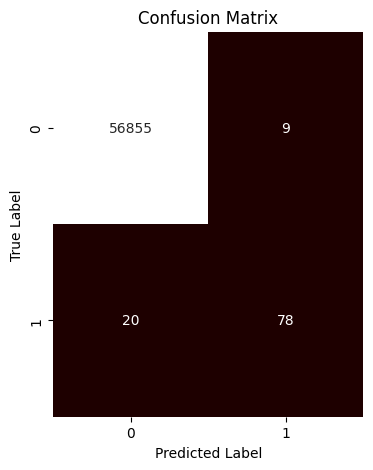

In [83]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,confusion_matrix

# Sélectionner uniquement les colonnes correspondant aux caractéristiques sélectionnées
X_test_selected = X_test[selected_feature_names]

# Calculer les métriques d'évaluation
accuracy = accuracy_score(y_test, y_pred_rf_final)
precision = precision_score(y_test, y_pred_rf_final)
recall = recall_score(y_test, y_pred_rf_final)
f1 = f1_score(y_test, y_pred_rf_final)
conf_matrix=confusion_matrix(y_test, y_pred_rf_final)

# Créer une liste des noms de métriques et de leurs scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
scores = [accuracy, precision, recall, f1]

# Créer un bar plot pour les métriques d'évaluation
plt.figure(figsize=(5, 5))
sns.barplot(x=metrics, y=scores, palette='magma')
plt.title('Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# Afficher la matrice de confusion
plt.figure(figsize=(4, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [84]:
# Sélectionner aléatoirement 500 points à partir du dataframe df
random_points = df.sample(n=500, random_state=42)


In [85]:
# Diviser les caractéristiques et les étiquettes
X_random = random_points.drop('Class', axis=1)
y_random = random_points['Class']


In [86]:
# Sélectionner uniquement les colonnes utilisées lors de l'entraînement du modèle
X_random_selected = X_random.loc[:, X_train.columns]


In [87]:
# Créer et ajuster le scaler sur les données d'entraînement
scaler = StandardScaler()
scaler.fit(X_train_selected)


StandardScaler()

In [88]:
# Appliquer la même sélection de caractéristiques sur X_random_selected
X_random_selected = selector.transform(X_random_selected)

# Appliquer le scaler aux données de test sélectionnées
X_random_selected_scaled = scaler.transform(X_random_selected)


In [89]:
# Faire des prédictions sur les points sélectionnés
predictions_random = rf_model_final.predict(X_random_selected_scaled)


In [90]:
# Afficher les prédictions et les étiquettes réelles
print("Predictions for 500 random samples:")
print(predictions_random)
print("Actual labels:")
print(y_random)


Predictions for 500 random samples:
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score , confusion_matrix

accuracy = accuracy_score(y_random, predictions_random)

# Calculer la précision
precision = precision_score(y_random, predictions_random)

# Calculer le rappel
recall = recall_score(y_random, predictions_random)

# Calculer le F1-score
f1 = f1_score(y_random, predictions_random)

conf_matrix = confusion_matrix(y_random, predictions_random)

print("Performance du modèle sur les 500 points aléatoires :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)



Performance du modèle sur les 500 points aléatoires :
Accuracy : 1.00
Précision : 1.00
Rappel : 1.00
F1-score : 1.00
Confusion Matrix:
[[499   0]
 [  0   1]]


**INTERPRETATION: **


*   Accuracy :L'accuracy de 1.00 signifie que toutes les prédictions du modèle sont correctes sur l'ensemble des données de test. Il n'y a aucune erreur de prédiction.
*   Précision : Une précision de 1.00 pour chaque classe (0 et 1) indique qu'aucune des prédictions positives n'est fausse. Cela signifie qu'aucune transaction non frauduleuse n'a été faussement classée comme frauduleuse et qu'aucune transaction frauduleuse n'a été faussement classée comme non frauduleuse.


*   Recall : Un rappel de 1.00 pour chaque classe indique que le modèle a réussi à identifier toutes les instances positives dans l'ensemble des données de test. Il n'y a pas de faux négatifs.
*   F1-score : Le F1-score de 1.00 pour chaque classe indique une excellente harmonie entre la précision et le rappel. Cela montre que le modèle est capable de bien généraliser et d'identifier correctement les deux classes sans compromis.


*   La matrice de confusion montre que le modèle a correctement classé les 499 transactions non frauduleuses dans la classe 0 et la seule transaction frauduleuse dans la classe 1. Il n'y a aucune erreur de classification.







In [92]:
# Sélectionner aléatoirement 4000 points à partir du dataframe df
random_points = df.sample(n=4000, random_state=42)

In [93]:
# Diviser les caractéristiques et les étiquettes
X_random = random_points.drop('Class', axis=1)
y_random = random_points['Class']

In [94]:
# Sélectionner uniquement les colonnes utilisées lors de l'entraînement du modèle
X_random_selected = X_random.loc[:, X_train.columns]

In [95]:
# Créer et ajuster le scaler sur les données d'entraînement
scaler = StandardScaler()
scaler.fit(X_train_selected)

StandardScaler()

In [96]:
# Appliquer la même sélection de caractéristiques sur X_random_selected
X_random_selected = selector.transform(X_random_selected)

# Appliquer le scaler aux données de test sélectionnées
X_random_selected_scaled = scaler.transform(X_random_selected)

In [97]:
# Faire des prédictions sur les points sélectionnés
predictions_random = rf_model_final.predict(X_random_selected_scaled)

In [98]:
# Afficher les prédictions et les étiquettes réelles
print("Predictions for 4000 random samples:")
print(predictions_random)
print("Actual labels:")
print(y_random)

Predictions for 4000 random samples:
[1 0 0 ... 0 0 0]
Actual labels:
43428     1
49906     0
29474     0
276481    0
278846    0
         ..
14928     0
148081    0
232426    0
27367     0
133328    0
Name: Class, Length: 4000, dtype: int64


In [99]:
from sklearn.metrics import precision_score, recall_score, f1_score , accuracy_score , confusion_matrix

accuracy = accuracy_score(y_random, predictions_random)

# Calculer la précision
precision = precision_score(y_random, predictions_random)

# Calculer le rappel
recall = recall_score(y_random, predictions_random)

# Calculer le F1-score
f1 = f1_score(y_random, predictions_random)

conf_matrix = confusion_matrix(y_random, predictions_random)

print("Performance du modèle sur les 4000 points aléatoires :")
print(f"Accuracy : {accuracy:.2f}")
print(f"Précision : {precision:.2f}")
print(f"Rappel : {recall:.2f}")
print(f"F1-score : {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Performance du modèle sur les 4000 points aléatoires :
Accuracy : 1.00
Précision : 1.00
Rappel : 0.75
F1-score : 0.86
Confusion Matrix:
[[3996    0]
 [   1    3]]


**INTERPRETATION:**


*   Accuracy : L'accuracy de 1.00 signifie que toutes les prédictions du modèle sont correctes sur l'ensemble des 4000 données de test. Il n'y a aucune erreur de prédiction.
*   Précision : Une précision de 1.00 pour chaque classe (0 et 1) indique qu'aucune des prédictions positives n'est fausse. Cela signifie qu'aucune transaction non frauduleuse n'a été faussement classée comme frauduleuse et qu'aucune transaction frauduleuse n'a été faussement classée comme non frauduleuse.


*   Recall : Un rappel de 0.75 pour la classe 1 (transactions frauduleuses) signifie que le modèle a réussi à identifier 3 des 4 transactions frauduleuses dans l'ensemble des 4000 données de test. Cependant, il y a eu un faux négatif, c'est-à-dire qu'une transaction frauduleuse n'a pas été détectée par le modèle.
*   F1-score : Le F1-score de 0.86 pour la classe 1 indique une bonne harmonie entre la précision et le rappel pour la détection des transactions frauduleuses. Cependant, il est légèrement inférieur à 1.00, ce qui suggère qu'il y a une certaine marge d'amélioration pour la capacité du modèle à détecter toutes les transactions frauduleuses.


*   Matrice de confusion : La matrice de confusion montre que le modèle a correctement classé 3996 des transactions non frauduleuses dans la classe 0. Cependant, une des transactions frauduleuses n'a pas été détectée (faux négatif), tandis que les trois autres ont été correctement classées.







# Sauvegarde

In [101]:
import joblib

# Sauvegarder le modèle et le scaler
joblib.dump(rf_model_final, 'model_rf.pkl')


['model_rf.pkl']

In [102]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [103]:
from google.colab import files

# Télécharger le fichier de modèle
files.download('model_rf.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [104]:


# Télécharger le fichier de modèle
files.download('scaler.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install --upgrade scikit-learn